# 실습) 피마 인디언 당뇨병 예측(Kaggle)
+ kaggle에서 csv파일 다운로드

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('./pima_indian_diabetes/diabetes.csv')
print(data['Outcome'].value_counts())
data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [45]:
# 데이터 파악
data.info() # 결측치 값도 없고 스트링형식의 데이터도 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**get_clf_eval()**

In [46]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC_AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC_AUC print 추가
    print('정확도{0:.4f}, 정밀도{1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

**precision_recall_curve_plot()**

In [47]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축: threshold, y축: 정밀도(점선), 재현율 (실선)
    plt.figure(figsize= (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x, y축 label, legen, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

### 1) Logistic Regression 학습 / 테스트 / 예측

In [48]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 추출
# 데이터 맨 끝 outcome 컬럼이 label.
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 피처데이터 -> train, test 
# 레이블데이터 -> train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0, stratify = y)

# 로지스틱 회귀로 학습
lr_clf = LogisticRegression(solver = 'liblinear')

# 모델 학습
lr_clf.fit(X_train, y_train)

# 결과 예측
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1] # outcome = 1 일때의 확률

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[92  8]
 [24 30]]
정확도0.7922, 정밀도0.7895, 재현율: 0.5556,     F1: 0.6522, AUC: 0.8804


**precision recall 곡선 그림**

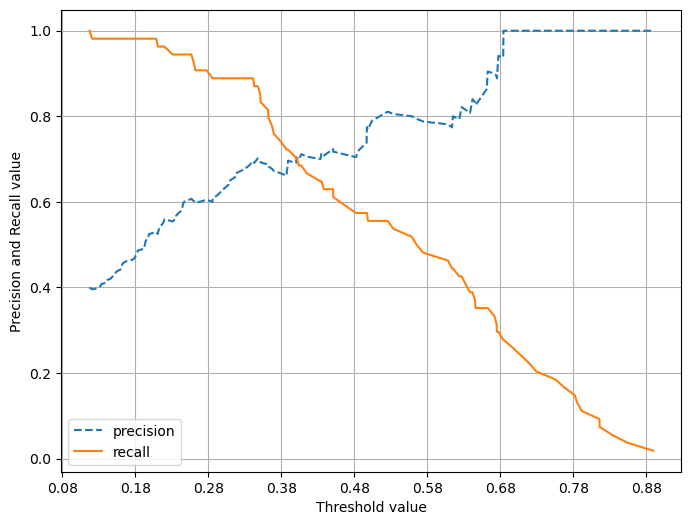

In [27]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

**각 피처들의 값 4분위 분포 확인**

In [40]:
data.describe()
# 주의: 0 인 데이터에 주의

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Glucose 피처의 분포도**

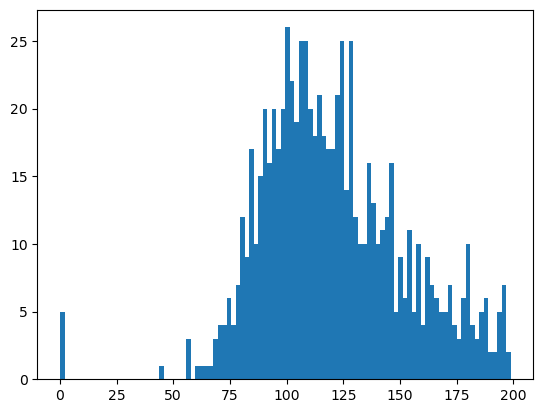

In [32]:
plt.hist(data['Glucose'], bins=100)
plt.show()

In [50]:
# 0 값이 있는 피처를 따로 뽑아서 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = data['Glucose'].count()

for feature in zero_features:
    zero_count = data[data[feature]==0][feature].count()
    
    print('{0} 데이터값이 0인 건 수: {1}, 퍼센트: {2:.2f}%'.format(feature, zero_count, 100*zero_count / total_count))

Glucose 데이터값이 0인 건 수: 0, 퍼센트: 0.00%
BloodPressure 데이터값이 0인 건 수: 0, 퍼센트: 0.00%
SkinThickness 데이터값이 0인 건 수: 0, 퍼센트: 0.00%
Insulin 데이터값이 0인 건 수: 0, 퍼센트: 0.00%
BMI 데이터값이 0인 건 수: 0, 퍼센트: 0.00%


**0값을 평균값으로 대체** <br>
zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체

In [49]:
data[zero_features] = data[zero_features].replace(0,data[zero_features].mean())

**StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체한 데이터 세트로 학습/예측**

In [51]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[89 11]
 [25 29]]
정확도0.7662, 정밀도0.7250, 재현율: 0.5370,     F1: 0.6170, AUC: 0.8794


**분류결정 임곗값을 변경하면서 성능 측정**

In [52]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [61]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차행렬
[[75 25]
 [ 8 46]]
정확도0.7857, 정밀도0.6479, 재현율: 0.8519,     F1: 0.7360, AUC: 0.8794
임곗값: 0.33
오차행렬
[[78 22]
 [11 43]]
정확도0.7857, 정밀도0.6615, 재현율: 0.7963,     F1: 0.7227, AUC: 0.8794
임곗값: 0.36
오차행렬
[[81 19]
 [15 39]]
정확도0.7792, 정밀도0.6724, 재현율: 0.7222,     F1: 0.6964, AUC: 0.8794
임곗값: 0.39
오차행렬
[[81 19]
 [16 38]]
정확도0.7727, 정밀도0.6667, 재현율: 0.7037,     F1: 0.6847, AUC: 0.8794
임곗값: 0.42
오차행렬
[[85 15]
 [17 37]]
정확도0.7922, 정밀도0.7115, 재현율: 0.6852,     F1: 0.6981, AUC: 0.8794
임곗값: 0.45
오차행렬
[[86 14]
 [23 31]]
정확도0.7597, 정밀도0.6889, 재현율: 0.5741,     F1: 0.6263, AUC: 0.8794
임곗값: 0.48
오차행렬
[[89 11]
 [25 29]]
정확도0.7662, 정밀도0.7250, 재현율: 0.5370,     F1: 0.6170, AUC: 0.8794
임곗값: 0.5
오차행렬
[[89 11]
 [25 29]]
정확도0.7662, 정밀도0.7250, 재현율: 0.5370,     F1: 0.6170, AUC: 0.8794


In [63]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차행렬
[[89 11]
 [25 29]]
정확도0.7662, 정밀도0.7250, 재현율: 0.5370,     F1: 0.6170, AUC: 0.8794
